In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Flatten,Conv2D,MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_dir="D:\\AI Project\\skin\\data\\train"
test_dir="D:\\AI Project\\skin\\data\\test"

datagn=ImageDataGenerator(rescale=1/255,validation_split=0.2,zoom_range=.2,shear_range=.2,rotation_range=.3)
test_datagn=ImageDataGenerator(rescale=1/255)


train_set=datagn.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=4,
    class_mode="categorical",
    subset="training"
    )

valid_set=datagn.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=4,
    class_mode="categorical",
    subset="validation"
)

test_set=test_datagn.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

Found 7684 images belonging to 2 classes.
Found 1921 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
from keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')  # Uses float16 for calculations where possible

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3050 Laptop GPU, compute capability 8.6


In [4]:
train_set.class_indices

{'benign': 0, 'malignant': 1}

In [5]:
labels=['benign','malignant']
print(labels)

['benign', 'malignant']


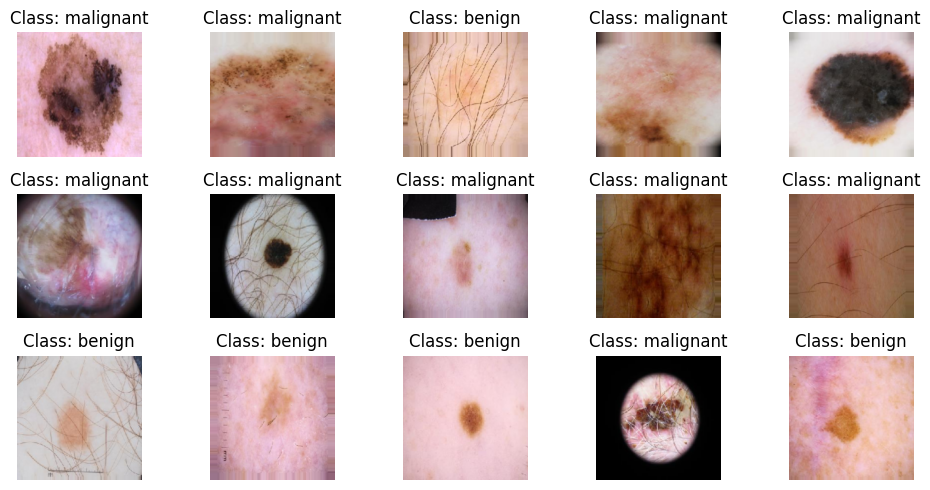

In [6]:
plt.figure(figsize=(10, 5))

for i in range(15):  
    plt.subplot(3, 5, i+1) 
    image, label = train_set.next()  
    plt.imshow(image[0])  
    plt.axis("off")  
    plt.title(f"Class: {labels[np.argmax(label)]}") 

plt.tight_layout()  
plt.show()

In [21]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())


model.add(Conv2D(100,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(28,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(16,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(500,activation="relu"))
model.add(Dropout(.5))

model.add(Dense(200,activation="relu"))
model.add(Dropout(.2))

model.add(Dense(50,activation="relu"))
model.add(Dropout(.3))

model.add(Dense(2,activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 55, 55, 64)       256       
 hNormalization)                                                 
                                                      

In [22]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
histroy=model.fit(train_set,epochs=30,validation_data=valid_set,batch_size=4)

Epoch 1/30
1921/1921 [==============================] - 59s 30ms/step - loss: 0.4661 - accuracy: 0.7876 - val_loss: 0.4419 - val_accuracy: 0.7361
Epoch 2/30
1921/1921 [==============================] - 57s 30ms/step - loss: 0.3894 - accuracy: 0.8277 - val_loss: 0.3440 - val_accuracy: 0.8235
Epoch 3/30
1921/1921 [==============================] - 62s 32ms/step - loss: 0.3647 - accuracy: 0.8457 - val_loss: 0.3411 - val_accuracy: 0.8438
Epoch 4/30
1921/1921 [==============================] - 59s 31ms/step - loss: 0.3560 - accuracy: 0.8459 - val_loss: 0.3756 - val_accuracy: 0.8313
Epoch 5/30
1921/1921 [==============================] - 59s 31ms/step - loss: 0.3450 - accuracy: 0.8522 - val_loss: 0.4001 - val_accuracy: 0.8194
Epoch 6/30
1921/1921 [==============================] - 62s 32ms/step - loss: 0.3288 - accuracy: 0.8572 - val_loss: 0.3085 - val_accuracy: 0.8839
Epoch 7/30
1921/1921 [==============================] - 69s 36ms/step - loss: 0.3182 - accuracy: 0.8632 - val_loss: 0.3625 -

In [25]:
test_loss,test_acc=model.evaluate(test_set)
print(test_acc)

32/32 [==============================] - 1s 31ms/step - loss: 0.2370 - accuracy: 0.8960
0.8960000276565552


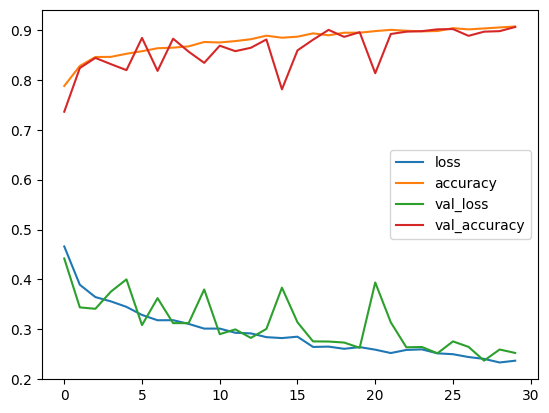

In [26]:
pd.DataFrame(histroy.history).plot()
plt.show()

In [24]:
model.save("skin_3.h5")